# Gibbs Sampling

Example Source https://wiseodd.github.io/techblog/2015/10/09/gibbs-sampling/

## Gibb Sampler to draw sampler from a Bivariate Gaussian with 

* mu of [5, 5] and 

* sigma/covariance matrix of [[1, 0.9], [0.9, 1]].


In [1]:
import numpy as np
import seaborn as sns

In [2]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

print("mus", mus)
print("Sigmas", sigmas)

mus [5 5]
Sigmas [[1.  0.9]
 [0.9 1. ]]


In [3]:
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

In [4]:
def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)

In [5]:
def gibbs_sampling(mus, sigmas, iter=10000):
    
    # Get a set of random values 
    samples = np.zeros((iter, 2))
    y = np.random.rand() * 10

    for i in range(iter):
        
        # Calculate X = P(Y| mus, sigmas)
        x = p_x_given_y(y, mus, sigmas)
        
        # pass the x to get the Y = P(X| mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples

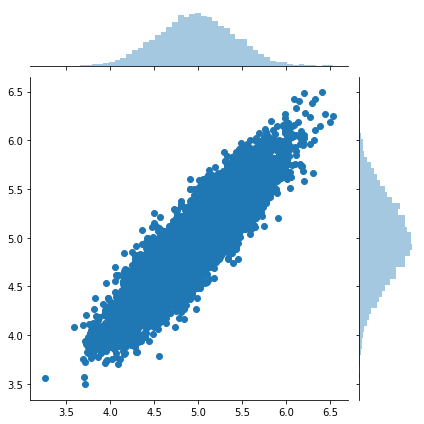

In [6]:
samples = gibbs_sampling(mus, sigmas)
sns.jointplot(samples[:, 0], samples[:, 1])

In [7]:
samples

array([[3.26460656, 3.5604099 ],
       [3.6987852 , 3.5730732 ],
       [3.81495016, 3.98975282],
       ...,
       [5.07534726, 5.00122569],
       [4.6703581 , 4.81370702],
       [4.9704766 , 4.7175709 ]])

In [8]:
np.mean(samples[:, 0])

4.974709966825232

In [9]:
np.mean(samples[:, 1])

4.9755836140411

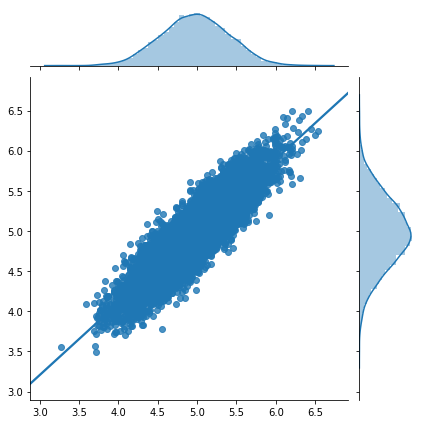

In [10]:
sns.jointplot(samples[:, 0], samples[:, 1], kind="reg")